<a href="https://colab.research.google.com/github/mwahajkhan/Supervised-ML-Regression-/blob/main/Regression_Training_and_Test_splits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Analyzing the data set **Housing prices in Ames, Iowa**

> Train and Test split for linear model



### Predictor

* SalePrice: The property's sale price in dollars.

### Features

* MoSold: Month Sold
* YrSold: Year Sold   
* SaleType: Type of sale
* SaleCondition: Condition of sale
* MSSubClass: The building class
* MSZoning: The general zoning classification


In [9]:
#helps import data csv file
import os

In [10]:
!pip install tqdm seaborn pandas numpy scikit-learn

In [11]:
import pandas as pd
import numpy as np

In [14]:
path = '/content/sample_data/Ames_Housing_Sales.csv'

data = pd.read_csv(path)

In [15]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [16]:
data.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           1297
BedroomAbvGr       0
                ... 
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
SalePrice          0
Length: 80, dtype: int64

In [17]:
data.shape

(1379, 80)

In [18]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
Name: count, dtype: int64



```
# This is formatted as code
```



###Ensure all columns are propely encoded

* Categorical vs Ordered Categorical

* Ordinal vs nominal

* Ordered categories are one-hot-encoded, which can increase number of features, and these features are highly correlated.

*  Trying to determing wether initially 80 columns, how many total features would be present relative to what currently exists vs if all object features are one-hot encoded

* n = n -1 (Number of categories)

* After one hot encoding, drop the original column, and keep the new one-hot coded columns produced.

In [19]:
#Selet the object (string) columns
#Mask will return true, and false pd series of same length as columns

mask = data.dtypes == object
categorical_cols = data.columns[mask]


In [20]:
mask

1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
WoodDeckSF      False
YearBuilt       False
YearRemodAdd    False
YrSold          False
SalePrice       False
Length: 80, dtype: bool

In [21]:
categorical_cols

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

** > Using the .apply() method, which will apply some function to each individual column.**

x.nunique which will give you, for that column, the number of unique values, which is what we're looking for. When we want a hot encode, we're creating a new column for every single unique value in that column. So I'm going to say lambda x x.nunique, and we see that we have, for every column, the number of unique values in that column. That's going to be our num_ohc_cols. We can sort our values

**Filtering our data just to the categorical columns**

In [22]:
#Filter all the columns that are categorical
data[categorical_cols].apply(lambda x: x.nunique())

#Give out for every column the number of unique values in that column,
# which will be the num_ohc_cols

Alley             2
BldgType          5
BsmtCond          3
BsmtExposure      4
BsmtFinType1      5
BsmtFinType2      6
BsmtQual          4
CentralAir        2
Condition1        9
Condition2        8
Electrical        5
ExterCond         4
ExterQual         4
Exterior1st      14
Exterior2nd      16
Fence             4
FireplaceQu       5
Foundation        6
Functional        7
GarageCond        5
GarageFinish      3
GarageQual        5
GarageType        6
Heating           6
HeatingQC         5
HouseStyle        8
KitchenQual       4
LandContour       4
LandSlope         3
LotConfig         5
LotShape          4
MSZoning          5
MasVnrType        3
MiscFeature       4
Neighborhood     25
PavedDrive        3
PoolQC            3
RoofMatl          8
RoofStyle         6
SaleCondition     6
SaleType          9
Street            2
Utilities         2
dtype: int64

** Best Practice: Do not encode columns with only one value in that column **

In [23]:
#Determine how many extra columns will be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

#no need to encode if there only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

#Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1 #(n = n-1)

#This is 215 columns, assuming the original ones are dropped
#These are quiet a few extra columns
small_num_ohc_cols.sum()

204

> For all the categorical features we distinguished, In a new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Along with dropping the original column.

> For the data that are not one-hot encoded, dropping the columns that are string categoricals.

> Rather doing the pd.get_dummies, one hot encoding using sickit-learn method (more efficent)

> This uses sparse **matrix** , then making large complex matrices for encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    #print(data_ohc[col])
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(int)

    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(),
                          index=data_ohc.index,
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [25]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

215

In [26]:
print(data.shape[1])

# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

80
37


> Creating training and test splits of both datasets.

> Ensuring data split the same way using random_state

> Fitting basic linear regression model on the training data

> Calculating mean squared error on both train and test sets

> Estimating which respective model produces smaller error on the test data

In [29]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

#Splitting the data that is not on-hot encoded

    #Making features columns
feature_cols = [x for x in data.columns if x != y_col]

X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.3, random_state=42)

#Split the data that is one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data_ohc = data[feature_cols]
y_data_ohc = data[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc,
                                                                    test_size=0.3, random_state=42)

In [32]:
X_train_ohc.shape

(965, 36)

In [34]:
y_train

461      86000.0
976      84000.0
1128    176000.0
904     124000.0
506     272000.0
          ...   
1095    146000.0
1130    144000.0
1294    165500.0
860     174000.0
1126    165000.0
Name: SalePrice, Length: 965, dtype: float64

In [31]:
#Comparing indicies to ensure they are identical
(X_train_ohc.index == X_train.index).all()

True

In [35]:
#Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

True

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

#Storage for error values
error_df = list()

#Data that have not been one-hot-encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

#displays error value for non-ohc column with train and test indicies

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test': mean_squared_error(y_test, y_test_pred)},
                           name='no enc'))

#Data that has not been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

#displays error value for ohc column with train and test indicies
error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test': mean_squared_error(y_test_ohc, y_test_ohc_pred)},
                           name='no-hot enc'))

error_df = pd.concat(error_df, axis=1)
error_df

,no enc,no-hot enc
train,1.131507e+09,1.131507e+09
test,1.372182e+09,1.372182e+09


> Scaling the values using:

      * Standard Scaler

      * MinMax Scaler

> Comparing error calculated on test sets



In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler()}

#initialize model
LR = LinearRegression()

#iterate over all possible combinations and get the errors
errors = {}

#Initiate scaler_label and scaler

for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'scaling:'
  errors[key] = mean_squared_error(y_test, predictions)

errors = pd.Series(errors)

for key, error_val in errors.items():
  print(key, error_val)

standardscaling: 1373538557.4928713
minmaxscaling: 1372182358.9345078


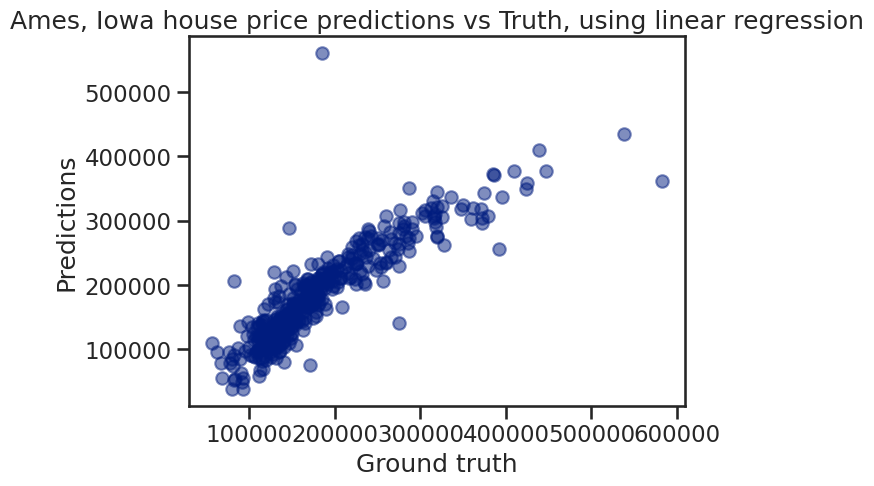

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
#by using y_test and y_test_pred
ax.scatter(y_test, y_test_pred, alpha=0.5)

ax.set(xlabel='Ground truth',
       ylabel='Predictions',
       title='Ames, Iowa house price predictions vs Truth, using linear regression');

**Conclusion:** **Most predicted values lie closer to the diagonal. Hence, we did a good job predicting.**